In [69]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [70]:
path='../python-ml-course/datasets/'
dataset=pd.read_csv(path+'ads/Advertising.csv')

## Regresion Lineal simple

In [71]:
linel_model=smf.ols(formula='Sales~TV',data=dataset).fit()

In [72]:
linel_model.pvalues #p valores

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [73]:
#informacion acerca de r2: https://medium.com/humansystemsdata/rse-vs-r%C2%B2-ba8fba098434

linel_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.47e-42
Time:                        14:14:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#sales_predict=7.0326+0.0475*dataset['TV']

#dataset['sales_predict']= linel_model.predict(pd.DataFrame(dataset['TV']))

dataset['sales_predict']= linel_model.predict(dataset[['TV']])

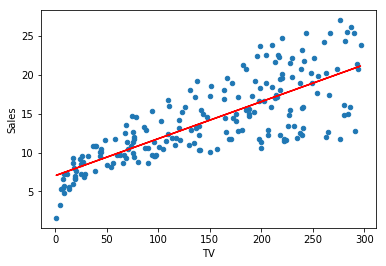

In [75]:
dataset.plot(kind='scatter',x='TV',y='Sales') #Forma 1 de graficar desde dataset

plt.plot(pd.DataFrame(dataset['TV']),dataset['sales_predict'],'red') #Forma 2 de graficar desde la libreria

In [76]:
#dataset['error_cuadrado_residual']=(dataset['Sales']-dataset['sales_predict'])**2

#informacion del error cuadratico: https://acolita.com/que-es-el-error-cuadratico-medio-rmse/

Error_cuadratico_residual=np.sqrt( (sum( (dataset['Sales']-dataset['sales_predict'])**2 )) / (len(dataset)-2) ) # Es -2 porque:-#variables-1=-2

print('Desviacion de los elementos: '+str(Error_cuadratico_residual)) 

Desviacion de los elementos: 3.258656368650463


In [77]:
error=( Error_cuadratico_residual / (np.mean(dataset['Sales'])) )*100

print('Error: '+str(error)+' %') 

Error: 23.23876889748948 %


## Regresion Lineal Multiple

In [78]:
linealmodel2=smf.ols(formula='Sales~TV+Newspaper',data=dataset).fit()

In [79]:
dataset['sales_predict_2']=linealmodel2.predict(dataset[['TV','Newspaper']])

In [80]:
linealmodel2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Se agregó una variable sin embargo:
    los **p valores** siguen siendo pequeños (1ra validacion para ver si se agrega la variable: **validada**)

In [81]:
RSE2=np.sqrt( sum( (dataset['Sales']-dataset['sales_predict_2'])**2 ) / (len(dataset)-3) )# Es -3 porque:-#variables-1=-3
             
print('RSE2: '+str(RSE2))

RSE2: 3.120719860252885


El valor RSE2 no aumentó, por el contrario disminuyó (segunda validación se **cumple**)

Por lo tanto se concluye: El modelo de predicción tiene una mejora **marginal**

Y asi sucesivamente, se van creando modelos lineales con las diferentes variables para ver cual es el **mas optimo**

![alt text](rmodelos.png "Title")

## Validacion de Modelo

In [82]:
from sklearn.cross_validation import train_test_split

In [83]:
train,test=train_test_split(dataset,test_size=.2)

In [84]:
lm3=smf.ols(formula='Sales~TV+Radio',data=train).fit() #Creamos el mejor modelomodelo
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     949.1
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.08e-88
Time:                        14:14:50   Log-Likelihood:                -284.41
No. Observations:                 160   AIC:                             574.8
Df Residuals:                     157   BIC:                             584.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1166      0.278     11.197      0.000       2.567       3.666
TV             0.0431      0.001     31.883      0.000       0.040       0.046
Radio          0.2013      0.008     25.100      0.000       0.185       0.217
==============================================================================
Omnibus:                       16.701   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.575
Skew:                          -0.794   Prob(JB):                     9.26e-05
Kurtosis:                       3.515   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
sales_predict_3=lm3.predict(train[['TV','Radio']])

RSE_train= (sum((train['Sales']-sales_predict_3)**2)) / ((len(train))-3) # Calculamos su error cuadratico

error_train=( RSE_train / (np.mean(train['Sales'])) )*100 # Calculamos su error en %

#Estos calculos son con fines paracticos de comparacion, solo se calcula el RSE,el error % y se predicen valores con el conjunto de TEST

In [86]:
test['sales_predict_4']=lm3.predict(test[['TV','Radio']])

RSE_test= (sum((test['Sales']-test['sales_predict_4'])**2)) / ((len(test))-3) # Calculamos error cuadratico del test

error_test=( RSE_test / (np.mean(test['Sales'])) )*100  # Calculamos error en % del test

/home/jess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
print('RSE: '+str(RSE_train)+ ' -- '+str(RSE_test))
print('Error: '+str(error_train)+ '% -- '+str(error_test)+'%')

RSE: 2.0878631393644618 -- 6.726388714974969
Error: 14.728543816335874% -- 50.15949824738976%
